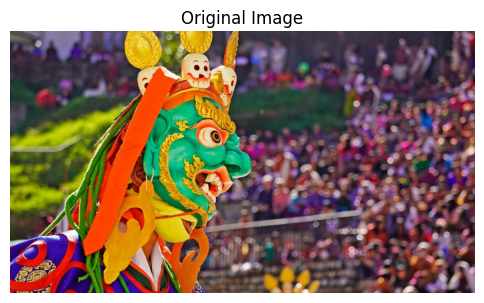

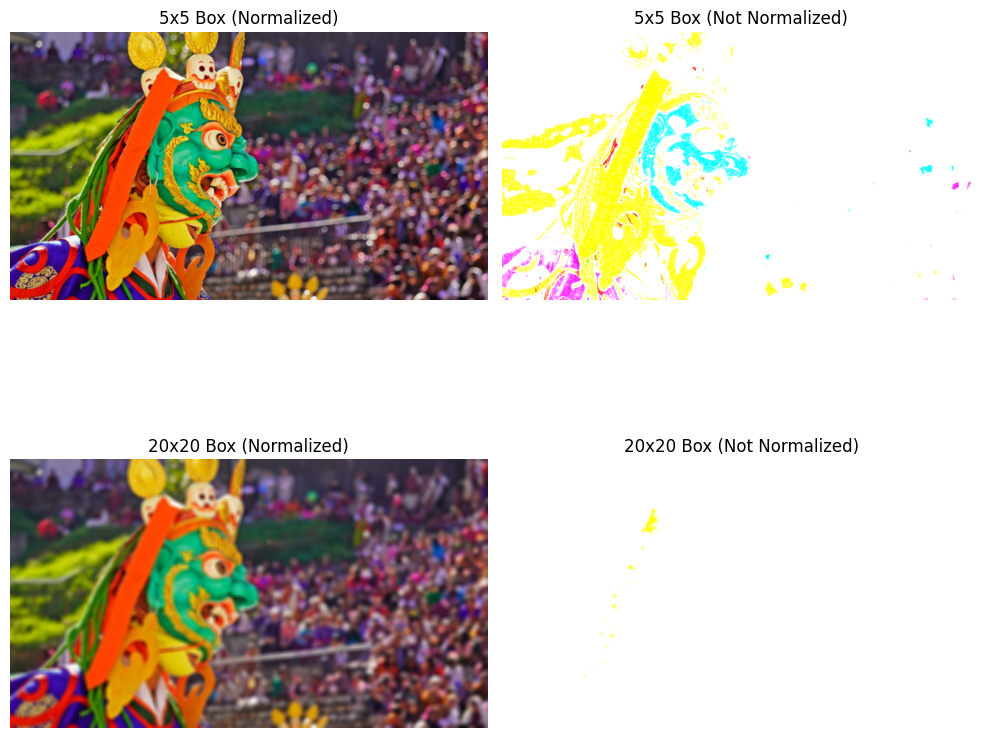

Sigma: 2.0
Filter size (from sigma): 13


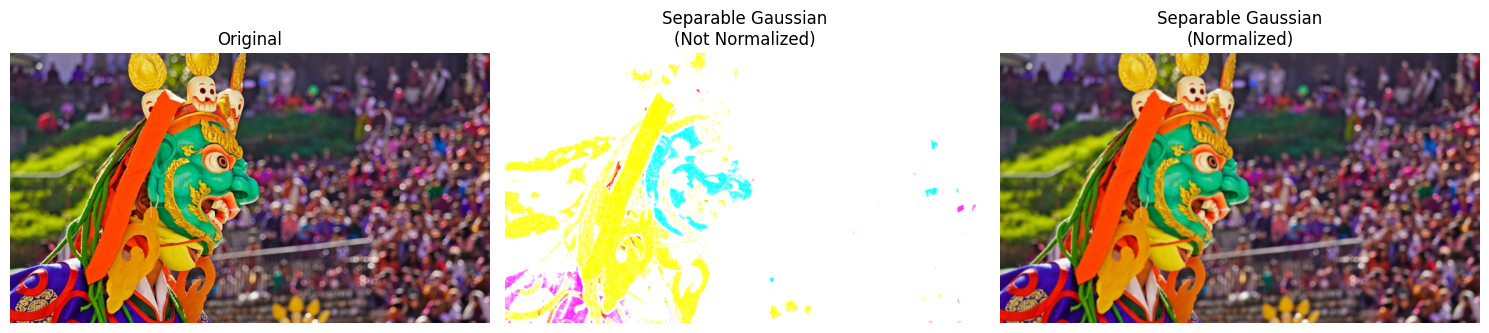

In [ ]:
# =============================
# 0. Imports
# =============================
import cv2
import numpy as np
import matplotlib.pyplot as plt

# For inline plots in Colab
%matplotlib inline

# =============================
# 1. Load the color image
# =============================
img_path = "/content/Torgya - Arunachal Festival.jpg"

# OpenCV reads images in BGR format
bgr = cv2.imread(img_path)
if bgr is None:
    raise FileNotFoundError(f"Image not found at: {img_path}")

# Convert to RGB for correct display with matplotlib
img = cv2.cvtColor(bgr, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(6,6))
plt.title("Original Image")
plt.imshow(img)
plt.axis("off")
plt.show()

# =============================
# 2. Box filters (5x5 and 20x20)
#    with and without normalization
# =============================

def box_filter(image, ksize, normalize=True):
    """
    Apply a ksize x ksize box filter on a color image.
    If normalize is True, the kernel sums to 1.
    """
    kernel = np.ones((ksize, ksize), dtype=np.float32)
    if normalize:
        kernel = kernel / (ksize * ksize)
    filtered = cv2.filter2D(image, ddepth=-1, kernel=kernel)
    return filtered

# 5x5 box filter
box_5_norm = box_filter(img, 5, normalize=True)
box_5_no_norm = box_filter(img, 5, normalize=False)

# 20x20 box filter
box_20_norm = box_filter(img, 20, normalize=True)
box_20_no_norm = box_filter(img, 20, normalize=False)

# Show results
fig, axs = plt.subplots(2, 2, figsize=(10,10))
axs[0,0].imshow(box_5_norm);     axs[0,0].set_title("5x5 Box (Normalized)")
axs[0,1].imshow(box_5_no_norm);  axs[0,1].set_title("5x5 Box (Not Normalized)")
axs[1,0].imshow(box_20_norm);    axs[1,0].set_title("20x20 Box (Normalized)")
axs[1,1].imshow(box_20_no_norm); axs[1,1].set_title("20x20 Box (Not Normalized)")

for ax in axs.ravel():
    ax.axis("off")
plt.tight_layout()
plt.show()

# =============================
# 3. Separable Gaussian filters
#    (normalised and non-normalised)
# =============================

# ---- 3.1 Choose sigma and compute filter size from it ----
sigma = 2.0  # You can change this value to make it smoother/less smooth

# Common rule of thumb: filter size = 6*sigma + 1  (to cover ±3σ)
filter_size = int(6 * sigma + 1)
if filter_size % 2 == 0:  # make sure filter size is odd
    filter_size += 1

print("Sigma:", sigma)
print("Filter size (from sigma):", filter_size)

# ---- 3.2 Create 1D Gaussian kernels (separable) ----
# Coordinates centered at zero
half = filter_size // 2
x = np.arange(-half, half + 1, dtype=np.float32)

# Unnormalized Gaussian
gauss_1d = np.exp(-(x**2) / (2 * sigma**2)).astype(np.float32)

# Normalized Gaussian: sum to 1
gauss_1d_norm = gauss_1d / gauss_1d.sum()

# ---- 3.3 Apply separable Gaussian filters on the color image ----
# Separable, non-normalized Gaussian (will change overall brightness)
gauss_sep = cv2.sepFilter2D(img, ddepth=-1, kernelX=gauss_1d, kernelY=gauss_1d)

# Separable, normalized Gaussian (proper smoothing, brightness preserved)
gauss_sep_norm = cv2.sepFilter2D(img, ddepth=-1, kernelX=gauss_1d_norm, kernelY=gauss_1d_norm)

# =============================
# 4. Display Gaussian results
# =============================
fig, axs = plt.subplots(1, 3, figsize=(15,5))
axs[0].imshow(img);             axs[0].set_title("Original")
axs[1].imshow(gauss_sep);       axs[1].set_title("Separable Gaussian\n(Not Normalized)")
axs[2].imshow(gauss_sep_norm);  axs[2].set_title("Separable Gaussian\n(Normalized)")

for ax in axs:
    ax.axis("off")
plt.tight_layout()
plt.show()
